## Data Wrangling Project: WeRateDogs Twitter Account Analysis

## Table of Contents

<ul>
<li><a href="#Intro"><b>Introduction</b></a></li>
<li><a href="#Wrangle"><b>Wrangle Data: </b></a></li>
<ul><li><a href="#Gather">Gather Data</a></li>
<li><a href="#Assess">Assess Data</a></li>
<li><a href="#Clean">Clean Data</a></li>
</ul>
<li><a href="#Analyze"><b>Analyze and Visualize Data</b></a></li>
</ul>

<a id='Intro'></a>
## Introduction

In this Project I'll Perform Analyzing, Wrangling,and Visualizing our Dataset, which is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

<a id='Gather'></a>
## Gather Data

In [1]:
import pandas as pd
import numpy as np
import requests
#import tweepy 
import json
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display
from bs4 import BeautifulSoup

%matplotlib inline

### Read twitter-archive-enhanced.csv Data

In [2]:
# Read twitter-archive-enhanced.csv file
df_tw_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Download and Read image-predictions.tsv Data

In [3]:
# Download image-predictions.tsv File
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 

response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
df_img_prediction = pd.read_csv('image_predictions.tsv', sep='\t')
df_img_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Read twitter Data From Twitter API and store it in tweet-json file then read data from it 
#### Note: since that I couldn\' t get twitter API I put the code as a comment and used tweet-json.txt file to get data

In [4]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_secret = ''

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [5]:
# Create a dataframe with tweet ID, retweet count, and favorite count
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        tweet_retweet_count = tweet['retweet_count']
        tweet_favorite_count = tweet['favorite_count']

        df_list.append({
            'tweet_id': tweet_id,
            'retweet_count': tweet_retweet_count,
            'favorite_count': tweet_favorite_count
        })
df_tweet = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
       
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='Assess'></a>
## Assess Data

### 1. Tweet Archive

In [6]:
df_tw_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
df_tw_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
177,857393404942143489,NaN,NaN,2017-04-27 00:38:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Instead of the usual nightly dog rate, I'm sha...",NaN,NaN,NaN,https://www.gofundme.com/meeko-needs-heart-sur...,13,10,None,None,None,None,None
2040,671544874165002241,NaN,NaN,2015-12-01 04:22:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Interesting dog here. Very large. Purple. Mani...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671544874...,6,10,None,None,None,None,None
1426,697881462549430272,NaN,NaN,2016-02-11 20:34:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carter. He wakes up in the morning and...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697881462...,10,10,Carter,None,None,None,None
429,821107785811234820,NaN,NaN,2017-01-16 21:32:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo who looks like he's about to gi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821107785...,11,10,None,doggo,None,None,None
1344,704499785726889984,NaN,NaN,2016-03-01 02:53:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you wake up from a long nap and have no i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704499785...,12,10,None,None,None,None,None


#### check Missing Values and Data Types of Data set 

In [8]:
df_tw_archive.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df_tw_archive.isnull().sum()


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
sum(df_tw_archive.duplicated())

0

In [11]:
sum(df_tw_archive['tweet_id'].duplicated())

0

In [12]:
df_tw_archive['retweeted_status_id'].count()

181

In [13]:
df_tw_archive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Leonard      1
Filup        1
Edd          1
Buddah       1
all          1
Name: name, Length: 957, dtype: int64

In [14]:
df_tw_archive['retweeted_status_timestamp'].value_counts()

2016-08-23 21:09:14 +0000    1
2015-11-16 04:02:55 +0000    1
2016-08-01 16:42:51 +0000    1
2016-12-12 16:16:49 +0000    1
2016-10-13 23:23:56 +0000    1
                            ..
2017-02-19 01:23:00 +0000    1
2017-05-18 01:17:25 +0000    1
2016-09-02 18:03:10 +0000    1
2017-02-24 23:04:14 +0000    1
2016-05-16 00:31:53 +0000    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

In [15]:
df_tw_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
df_tw_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
df_tw_archive.query("name in ('a','O','o','None') ")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### 2. Image Perdiction

In [18]:
df_img_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
df_img_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1522,788070120937619456,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1,golden_retriever,0.735163,True,Sussex_spaniel,0.064897,True,Labrador_retriever,0.047704,True
1663,812372279581671427,https://pbs.twimg.com/media/C0YgO3DW8AAz98O.jpg,2,golden_retriever,0.784873,True,cocker_spaniel,0.087788,True,Labrador_retriever,0.083275,True
1070,716285507865542656,https://pbs.twimg.com/media/CfDB3aJXEAAEZNv.jpg,1,Yorkshire_terrier,0.430420,True,silky_terrier,0.196769,True,cairn,0.072676,True
513,676219687039057920,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,1,bubble,0.997556,False,leafhopper,0.000159,False,whippet,0.000132,True
1756,825026590719483904,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2,Eskimo_dog,0.524454,True,Siberian_husky,0.467678,True,malamute,0.004976,True


In [20]:
df_img_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1603,800141422401830912,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True
669,683078886620553216,https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg,1,koala,0.141432,False,Eskimo_dog,0.094044,True,wallaby,0.085237,False
1563,793601777308463104,https://pbs.twimg.com/media/CwNwmxvXEAEJ54Z.jpg,1,miniature_pinscher,0.538981,True,Chihuahua,0.217830,True,toy_terrier,0.089149,True
332,672139350159835138,https://pbs.twimg.com/media/CVPrLE2WwAELCxD.jpg,1,Rottweiler,0.290992,True,American_black_bear,0.238120,False,chimpanzee,0.115541,False
1156,733460102733135873,https://pbs.twimg.com/media/Ci3GDeyUoAAKOxn.jpg,1,chow,0.931275,True,beaver,0.028831,False,dhole,0.017379,False


#### check Missing Values and Data Types of Data set 

In [21]:
df_img_prediction.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_img_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [23]:
sum(df_img_prediction['tweet_id'].duplicated())

0

In [24]:
sum(df_img_prediction["jpg_url"].duplicated())

66

In [25]:
not_dog = df_img_prediction.query("p1_dog == False & p2_dog == False & p3_dog == False")
not_dog

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [26]:
display(HTML('<img src="https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg" /><img src="https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg" />'))

In [27]:
not_dog.count()[0]

324

## 3. Tweets Data

In [28]:
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


#### check Missing Values and Data Types of Data set 

In [29]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [30]:
df_tweet.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

## Quality Issues
<ul>
    
### <ui>tweets archive</ui>
<a href="#Q1">1. Missing expanded_urls in data frame </a> <br>
<a href="#Q2">2. Incorrect name values such as 'a', 'O', 'None'</a><br>
<a href="#Q3">3. Source cloumn contain html code</a><br>
<a href="#Q4">4. Wrong Data Type of timestamp,retweeted_status_timestamp, tweet_id cloumns </a><br>
<a href="#Q5">5. There are retweets recordes not tweet (retweeted_status_id not null) </a><br>
<a href="#Q6">6. Wrong Data on Stages Columns with multiple stages values</a><br>

### <ui>image prediction</ui>    
<a href="#Q7">7. Data include imagaes that all of three dog Predictions result = False</a><br>
<a href="#Q8">8. There are duplicate on image url </a><br>
<a href="#Q9">9. There are 2075 recordes in img_prediction data sets, but df_tw_archive contain 2356 tweets. there are 281 recordes without images </a><br>
</ul>


## <a href="#T"> Tidiness Issues </a><br>
<ul>
<a href="#T1">1. Merge three data sets  </a> <br>
<a href="#T2">2. Combine all dog stages columns (doggo, floofer, pupper, and puppo) into one column "stage"</a><br>
<a href="#T3">3. Drop unnecessary columns</a><br>
<a href="#T4">4. Calculate rating by divide numerator by denominator columns</a><br>
</ul>


<a id='Clean'></a>
## Clean Data


### Fist of all, Create Copy of all Datasets to use it in cleaning process

In [31]:
df_tw_archive_clean = df_tw_archive.copy()

In [32]:
df_img_prediction_clean = df_img_prediction.copy()

In [33]:
df_tweet_clean = df_tweet.copy()

<a id='Q1'></a>
> ### 1. Missing expanded_urls in data frame

### a. Define

Remove lines with null expanded_urls vales

### b. Code

In [34]:
# Delete lines with missing expanded_urls
df_tw_archive_clean=df_tw_archive_clean[df_tw_archive_clean.expanded_urls.notnull()]
df_tw_archive_clean


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### c. Test

In [35]:
df_tw_archive_clean.expanded_urls.isnull().sum()

0

<a id='Q2'></a>
> ### 2. Incorrect name values such as 'a', 'O', 'None'


### a. Define

Extract Coreect Namefrom text column 

### b. Code

In [36]:
# create list and extract name from text column and convert it to str then replace '' to nan 
name_list=[]
name_list = df_tw_archive_clean.text.str.findall('(?:This is|named|Meet|Say hello to|name is|Here we have|Here is)\s([A-Z][^\s.,]*)')
name_list =  name_list.apply(lambda x: ','.join(set(x)))
name_list =  name_list.replace('',np.nan)

#assign kist value to name column
df_tw_archive_clean.name = name_list

### c. Test

In [37]:
df_tw_archive_clean.name.value_counts()

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Penny      10
           ..
Filup       1
Edd         1
Buddah      1
Gabby       1
Daryl       1
Name: name, Length: 958, dtype: int64

In [38]:
df_tw_archive_clean.query("name in ('a','O','o','None') ")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<a id='Q3'></a>
> ### 3. Source cloumn contain html code

### a. Define

Extract Source value from the column using Beautifulsoab library

### b. Code

In [39]:
#extract source in HTML from a into source_list
source_list=[]
for text in df_tw_archive_clean.source:
    soup=BeautifulSoup(text,"html.parser")
    source=soup.find('a').string
    source_list.append(source)
    
# assign extracted source value to df source
df_tw_archive_clean.source=source_list

### c.Test

In [40]:
df_tw_archive_clean.source.value_counts()

Twitter for iPhone     2163
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64

In [41]:
df_tw_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,None,None,None,None


<a id='Q4'></a>
> ### 4. Wrong Data Type of timestamp,retweeted_status_timestamp, tweet_id cloumns 

### a. Define

Change Data Type using astype

### b. Code

In [42]:
#change data type 
df_tw_archive_clean['tweet_id']= df_tw_archive_clean['tweet_id'].astype(object)
df_tweet_clean['tweet_id']= df_tweet_clean['tweet_id'].astype(object)
df_img_prediction_clean['tweet_id']= df_img_prediction_clean['tweet_id'].astype(object)
df_tw_archive_clean['timestamp']= df_tw_archive_clean['timestamp'].astype('datetime64')
df_tw_archive_clean['retweeted_status_timestamp']= df_tw_archive_clean['retweeted_status_timestamp'].astype('datetime64')


### c. Test

In [43]:
df_tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2297 non-null   object        
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   2297 non-null   datetime64[ns]
 4   source                      2297 non-null   object        
 5   text                        2297 non-null   object        
 6   retweeted_status_id         180 non-null    float64       
 7   retweeted_status_user_id    180 non-null    float64       
 8   retweeted_status_timestamp  180 non-null    datetime64[ns]
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2297 non-null   int64         
 11  rating_denominator          2297 non-null   int64       

<a id='Q5'></a>
> ### 5. There are retweets recordes not tweet (retweeted_status_id not null)


### a. Define

Remove Retweets Recordes 


### b. Code

In [44]:
df_tw_archive_clean=df_tw_archive_clean[df_tw_archive_clean.retweeted_status_id.isnull()]
df_tw_archive_clean


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,None,None,None,None


### c. Test

In [45]:
df_tw_archive_clean.retweeted_status_id.notnull().sum()

0

<a id='Q6'></a>
> ### 6. Wrong Data on Stages Columns with multiple stages values


### a. Define

Remove Recordes with multiple stages

### b. Code

In [46]:
#Create data frame for multiple stages rows
wrong_df = df_tw_archive_clean.query("(doggo == 'doggo' and floofer == 'floofer') or (doggo == 'doggo' and pupper == 'pupper') or (doggo == 'doggo' and puppo == 'puppo') or "
                               +" (floofer == 'floofer' and pupper == 'pupper') or (floofer == 'floofer' and puppo == 'puppo') or "
                               +" (puppo == 'puppo' and pupper == 'pupper') "
                               )
wrong_df.count()[0]

12

In [47]:
#drop it from original data frame
df_tw_archive_clean.drop(wrong_df.index, axis=0,inplace=True)
#df_tw_archive_clean.count()[0]

D:\Programs\envs\py3_env\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### c. Test

In [48]:
 df_tw_archive_clean.query("(doggo == 'doggo' and floofer == 'floofer') or (doggo == 'doggo' and pupper == 'pupper') or (doggo == 'doggo' and puppo == 'puppo') or "
                               +" (floofer == 'floofer' and pupper == 'pupper') or (floofer == 'floofer' and puppo == 'puppo') or "
                               +" (puppo == 'puppo' and pupper == 'pupper') "
                               ).count()[0]

0

<a id='Q7'></a>
> ### 7. Data include imagaes that all of three dog Predictions result = False


### a. Define

Remove image's recordes with not dog predicition


### b. Code

In [49]:
#create new data frame with not dog predicition
not_dog = df_img_prediction_clean.query("p1_dog == False & p2_dog == False & p3_dog == False")
not_dog.count()[0]

324

In [50]:
#drop it from original data frame
df_img_prediction_clean.drop(not_dog.index, axis=0,inplace=True)

### c. Test

In [51]:
df_img_prediction_clean.query("p1_dog == False & p2_dog == False & p3_dog == False").count()[0]

0

<a id='Q8'></a>
> ### 8. There are duplicate on image url

### a. Define

Remove Duplicate rows

### b. Code

In [52]:
#create new data frame with duplicate jbg_url
duplicate_jpg_url = df_img_prediction_clean[df_img_prediction_clean["jpg_url"].duplicated()] 
duplicate_jpg_url.count()[0]

60

In [53]:
#drop it from original data frame
df_img_prediction_clean.drop(duplicate_jpg_url.index, axis=0,inplace=True)

### c.Test

In [54]:
df_img_prediction_clean[df_img_prediction_clean["jpg_url"].duplicated()].count()[0]

0

<a id='T'></a>
## Tidiness Issues


<a id='T1'></a>
<a id='Q9'></a>
> ### 1. Merge three datasets.
> #### Quality Issue : 9.There are 2075 recordes in img_prediction data sets, but df_tw_archive contain 2356 tweets. there are 281 recordes without images

### a. Define

Merge All Datasets into one using inner join function, sense we will use inner join 281 recordes in df_tw_archive will removed from new data frame

### b. Code

In [55]:
#join all datasets using 
df= pd.merge(df_tw_archive_clean, df_img_prediction_clean, on='tweet_id', how='inner')
df= pd.merge(df, df_tweet_clean, on='tweet_id', how='inner')

### c.Test

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 0 to 1675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1676 non-null   object        
 1   in_reply_to_status_id       19 non-null     float64       
 2   in_reply_to_user_id         19 non-null     float64       
 3   timestamp                   1676 non-null   datetime64[ns]
 4   source                      1676 non-null   object        
 5   text                        1676 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]
 9   expanded_urls               1676 non-null   object        
 10  rating_numerator            1676 non-null   int64         
 11  rating_denominator          1676 non-null   int64       

<a id='T2'></a>
> ### 2. Combine all dog stages columns (doggo, floofer, pupper, and puppo) into one column "stage"

### a. Define

Create stage Column toget values of all stages columns on one column

### b. Code

In [57]:
#Create stage column 
df['stage'] =df.apply(lambda row: 'doggo' if row['doggo'].lower() in 'doggo' 
                       else'pupper' if row['pupper'].lower() in 'pupper' 
                       else'floofer' if row['floofer'].lower() in 'floofer' 
                       else'puppo' if row['puppo'].lower() in 'puppo' else np.NaN
                      , axis=1)


### c.Test

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 0 to 1675
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1676 non-null   object        
 1   in_reply_to_status_id       19 non-null     float64       
 2   in_reply_to_user_id         19 non-null     float64       
 3   timestamp                   1676 non-null   datetime64[ns]
 4   source                      1676 non-null   object        
 5   text                        1676 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]
 9   expanded_urls               1676 non-null   object        
 10  rating_numerator            1676 non-null   int64         
 11  rating_denominator          1676 non-null   int64       

In [59]:
df['stage'].value_counts()

pupper     168
doggo       54
puppo       21
floofer      7
Name: stage, dtype: int64

<a id='T3'></a>
> ### 3. Drop unnecessary columns

### a. Define

Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp because we already remove retweet rows also all stages columns because we already create new stage column

### b. Code

In [60]:
df.drop(df[['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','doggo','floofer','pupper','puppo']],axis=1,inplace=True)

### c.Test

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 0 to 1675
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1676 non-null   object        
 1   in_reply_to_status_id  19 non-null     float64       
 2   in_reply_to_user_id    19 non-null     float64       
 3   timestamp              1676 non-null   datetime64[ns]
 4   source                 1676 non-null   object        
 5   text                   1676 non-null   object        
 6   expanded_urls          1676 non-null   object        
 7   rating_numerator       1676 non-null   int64         
 8   rating_denominator     1676 non-null   int64         
 9   name                   1210 non-null   object        
 10  jpg_url                1676 non-null   object        
 11  img_num                1676 non-null   int64         
 12  p1                     1676 non-null   object        
 13  p1_

<a id='T4'></a>
> ### 4. Calculate rating by divide numerator by denominator columns

### a. Define

Create rating_value Column

### b. Code

In [62]:
df["rating_value"]=df["rating_numerator"]/df["rating_denominator"]
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage,rating_value
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,NaN,1.3
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,NaN,1.2
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,NaN,1.3
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,NaN,1.2
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562,NaN,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,666049248165822465,NaN,NaN,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,...,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111,NaN,0.5
1672,666044226329800704,NaN,NaN,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311,NaN,0.6
1673,666033412701032449,NaN,NaN,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,...,malinois,0.138584,True,bloodhound,0.116197,True,47,128,NaN,0.9
1674,666029285002620928,NaN,NaN,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132,NaN,0.7


### c.Test

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 0 to 1675
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1676 non-null   object        
 1   in_reply_to_status_id  19 non-null     float64       
 2   in_reply_to_user_id    19 non-null     float64       
 3   timestamp              1676 non-null   datetime64[ns]
 4   source                 1676 non-null   object        
 5   text                   1676 non-null   object        
 6   expanded_urls          1676 non-null   object        
 7   rating_numerator       1676 non-null   int64         
 8   rating_denominator     1676 non-null   int64         
 9   name                   1210 non-null   object        
 10  jpg_url                1676 non-null   object        
 11  img_num                1676 non-null   int64         
 12  p1                     1676 non-null   object        
 13  p1_

## Store Data

In [64]:
# save progress for the next section
df.to_csv('twitter_archive_master.csv', date_format='%Y-%m-%d %H:%M:%S')# index=False)

<a id='Analyze'></a>
## Analyze and Visualize Data

#### After Wrangling Data, I analyze Data and get some insights :
<ul>
<li><a href="#I1">Which Dog's Stage have most favorites and Retweets</a></li>
<li><a href="#I2">Which Dog's Stage have most rates</a></li>
<li><a href="#I3">Which Dog's Stage have most Tweets Per Month</a></li>
</ul>

In [65]:
# Read twitter_archive_master.csv file
df_master = pd.read_csv('twitter_archive_master.csv')

In [66]:
df_master.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage,rating_value
0,0,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,NaN,1.3
1,1,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,NaN,1.2
2,2,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,NaN,1.3
3,3,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,NaN,1.2
4,4,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562,NaN,1.3


<a id='I1'></a>
## 1. Which Dog's Stage have most favorites and retweets

In [67]:
# using groupby to get Vote of each genres favorite_count.sum()
stage_favorait =df_master.groupby(['stage']).agg({'favorite_count': "sum", 'retweet_count': "sum" })#.reset_index(name='favorites')
stage_favorait

,favorite_count,retweet_count
stage,,
doggo,1047829,381233
floofer,92442,34781
pupper,1262826,406042
puppo,450614,133891


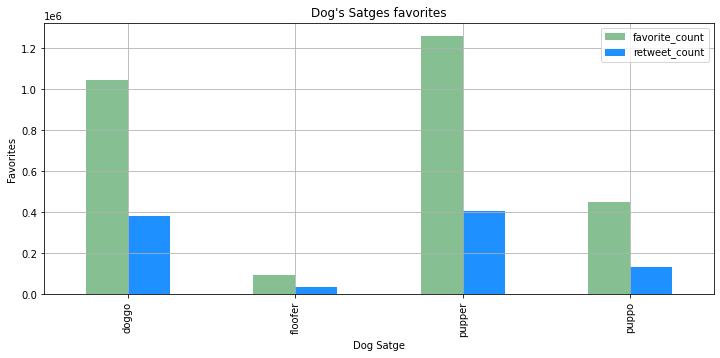

In [68]:
#Draw plot for Stage favorites & Retweets
stage_favorait_Plt=stage_favorait.plot(kind='bar',title='Dog\'s Satges favorites', y=['favorite_count','retweet_count'], grid=True,color=['#86bf91','#1e90ff'],figsize=(12, 5));
stage_favorait_Plt.set_xlabel("Dog Satge");
stage_favorait_Plt.set_ylabel("Favorites");


We found that both favorites and Retweets counts show the same result; pupper & doggo stages have the most favorites and retweets.

<a id='I2'></a>
## 2. Which Dog's Stage have most rates

In [69]:
# using groupby to get rate of each stage
stage_rating =df_master.groupby('stage').rating_value.mean().reset_index(name='rating_average')
stage_rating

,stage,rating_average
0,doggo,1.192593
1,floofer,1.200000
2,pupper,1.095833
3,puppo,1.195238


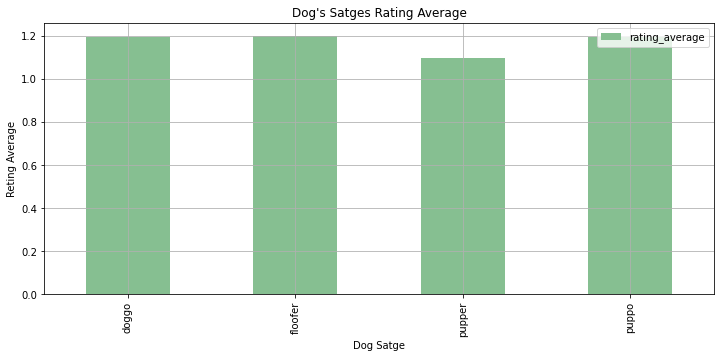

In [70]:
#Draw plot for stage rating avg
stage_rating_Plt=stage_rating.plot(kind='bar',title='Dog\'s Satges Rating Average', x='stage', y='rating_average', grid=True,color='#86bf91',figsize=(12, 5));
stage_rating_Plt.set_xlabel("Dog Satge");
stage_rating_Plt.set_ylabel("Reting Average");

Unlike favorites and retweets results pupper has the least rating result, and the highest rating values are pupper, and doggo respectively.

<a id='I3'></a>
## 3. Which Dog's Stage have most Tweets Per Month

In [71]:
# using groupby to get tweet count of each stage per month
tweets_Per_month =df_master.groupby([df['timestamp'].dt.strftime('%Y-%m'), 'stage']).tweet_id.count().reset_index(name='tweets_count')
tweets_Per_month

,timestamp,stage,tweets_count
0,2015-12,pupper,50
1,2016-01,floofer,1
2,2016-01,pupper,31
3,2016-02,pupper,18
4,2016-03,pupper,11
5,2016-04,doggo,3
6,2016-04,pupper,5
7,2016-05,doggo,3
8,2016-05,floofer,2
9,2016-05,pupper,8


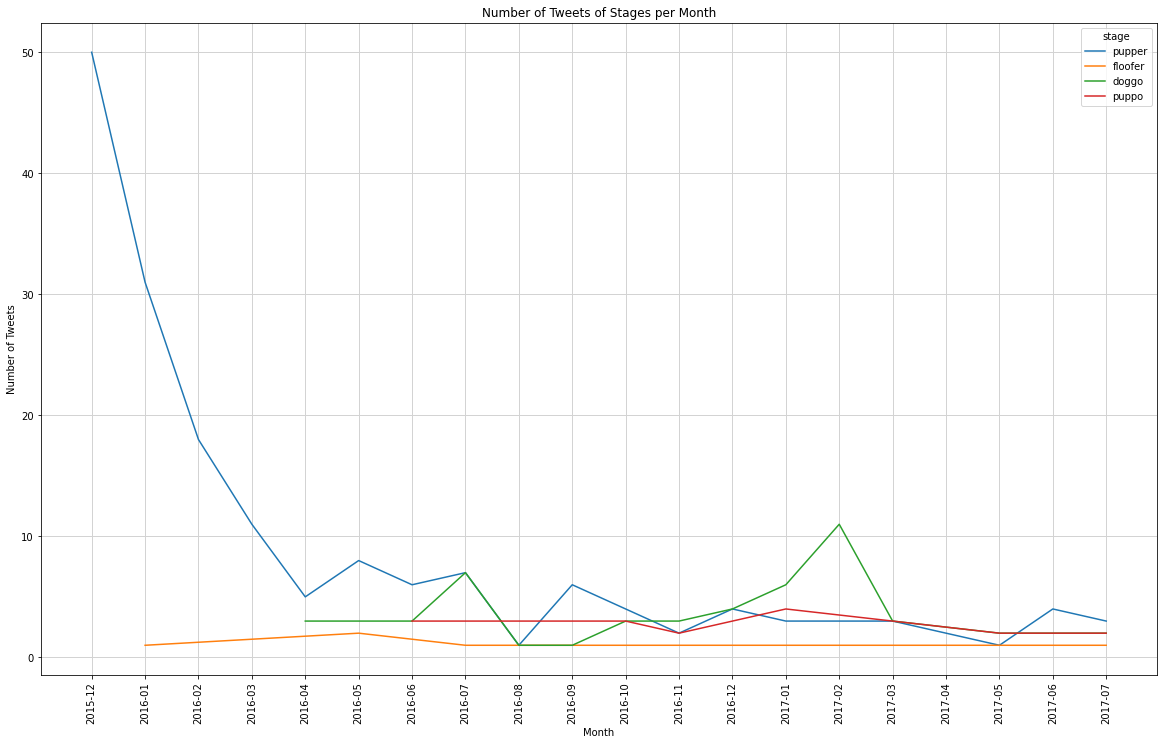

In [72]:
#plot multiple lines for stages
plt.figure(figsize=(20,12))
ax=sns.lineplot(data=tweets_Per_month, x='timestamp', y='tweets_count', hue='stage')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
# plot data
plt.xticks(rotation=90)
plt.title("Number of Tweets of Stages per Month")
plt.xlabel("Month")
plt.ylabel("Number of Tweets")
plt.show()


We Observe that from 2015 to July-2016 pupper dog stage has the most tweets, after that, all stages had tweets less than 10 tweets.